In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import glob
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
#from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
import category_encoders as ce
# Import the nltk package
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
!pip install pandas-profiling

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\darek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
pd.options.display.max_columns = 500 
pd.options.display.max_rows = 500
pd.options.display.float_format = '{:.4f}'.format
pd.options.display.max_seq_items = 2000

In [3]:
path = "D:\DATASETS\youtube-new\\"
for name in glob.glob(path):
    print(name)

D:\DATASETS\youtube-new\


In [4]:
canada = pd.read_csv(path +'CAvideos.csv')
print(canada.shape)
print(canada.info())
print(canada.isna().sum())
print(canada.describe(include='all'))

canada.head()



(40881, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
video_id                  40881 non-null object
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB
None
video_id                     0
trending_date              

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [5]:
def missplot(df):
  df.isna().sum().plot.bar(figsize=(16,6), color='red')
  plt.title('Count of Missing Values per Column ')
  plt.ylabel('Counts')
  plt.show()

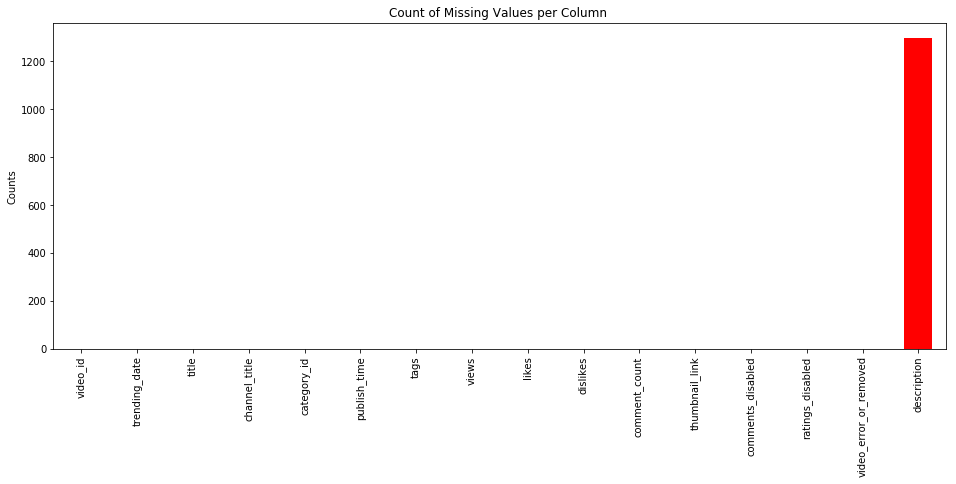

In [6]:
missplot(canada)

In [7]:
#videos we will want to exclude for categorizing since
#we are not sure they were uploadedd acurately or authentically

missing = canada[(canada.video_error_or_removed == True)]


In [8]:
len(missing)

27

In [9]:
canada.tags.nunique()

20157

In [10]:
canada.likes.describe()

count     40881.0000
mean      39582.6882
std      132689.5307
min           0.0000
25%        2191.0000
50%        8780.0000
75%       28717.0000
max     5053338.0000
Name: likes, dtype: float64

In [11]:
#mostlikes for the dataset
canada[canada.likes == canada.likes.max()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
36453,7C2z4GqqS5E,18.23.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",80738011,5053338,165854,1114800,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...


In [12]:
canada.dislikes.describe()


count     40881.0000
mean       2009.1954
std       19008.3698
min           0.0000
25%          99.0000
50%         303.0000
75%         950.0000
max     1602383.0000
Name: dislikes, dtype: float64

In [13]:
#most dislikes for the dataset
canada[canada.dislikes == 1602383.0000]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
5900,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014479,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."


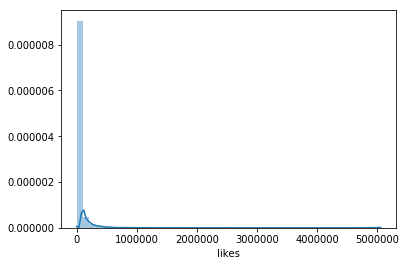

In [14]:
#What is the distribution of likes to dislikes?
sns.distplot(canada.likes);

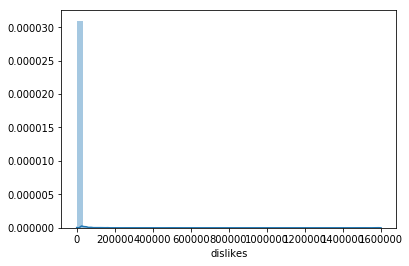

In [15]:
sns.distplot(canada.dislikes);

In [16]:
#check the data range of the observations
print(canada.trending_date.unique()[0])
canada.trending_date.unique().max()

17.14.11


'18.31.05'

In [17]:
#function to extract the category ids from file into a dictionary

def category_name(path):
    with open(path) as json_file:  
        data = json.load(json_file)
    category_info_list=[]
    for row in data['items']:
        id_info=row['id']
        category_name=row['snippet']['title']
        categoty_info=(id_info ,category_name)
        category_info_list.append(categoty_info)
    return(dict(category_info_list))

In [18]:
category_ids = category_name(path+"CA_category_id.json")
category_ids

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [19]:
#convert/add the categories to the dataframe by category_id number

category_list=category_ids
category_names=[]
for i in canada.category_id:
    category_name=category_list.get(str(i))
    category_names.append(category_name)

canada['category_names']=category_names

In [20]:
#give you a report of distribution of data/correlation
import pandas_profiling as pp

pp.ProfileReport(canada)



D:\Anaconda\lib\site-packages\pandas_profiling\model\base.py:173: UserWarning: Column "publish_time" appears to be containing only date/datetime values. You might consider changing the type to datetime (pd.to_datetime())
  "changing the type to datetime (pd.to_datetime())".format(series.name)


In [21]:
#What if we guessed the majority for each category?
y_train = canada['category_id']
y_train.value_counts(normalize=True)

24   0.3290
25   0.1017
22   0.1004
23   0.0923
10   0.0913
17   0.0682
1    0.0504
26   0.0491
20   0.0329
28   0.0283
27   0.0242
19   0.0096
15   0.0090
2    0.0086
43   0.0030
29   0.0018
30   0.0001
Name: category_id, dtype: float64

In [22]:
majority_class = y_train.mode()
y_pred = [majority_class] * len(y_train)

In [23]:
#What is the baseline accuracy if we guess the majority class everytime?
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.32902815488857906

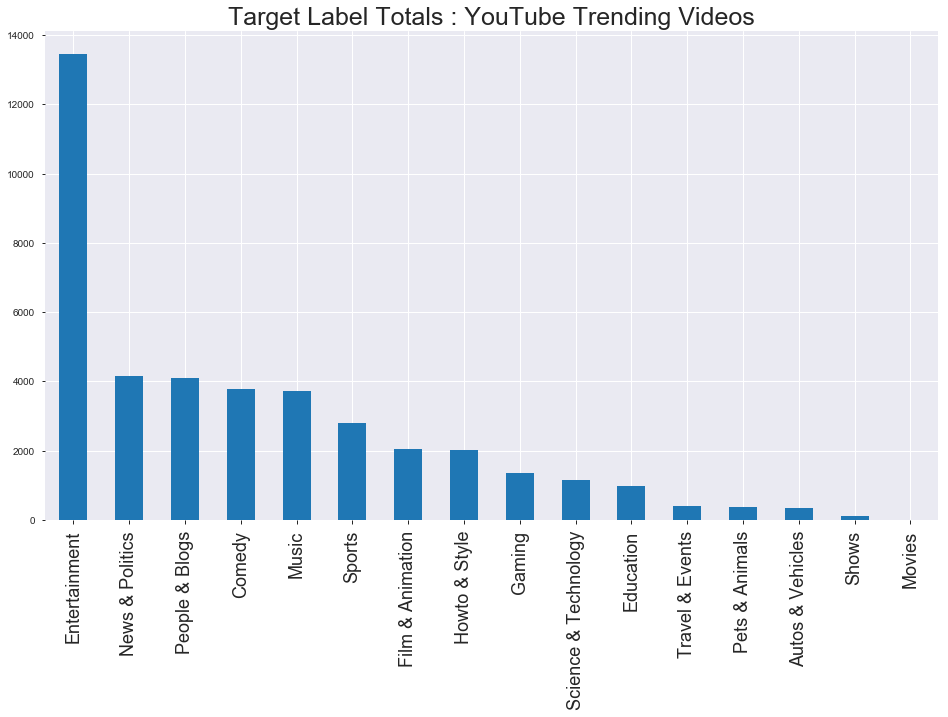

In [24]:
#This right skewed label data may be an issue and we might
#be better off sampling a more even distribution when it comes
#to test, train and val dataframes
plt.figure(figsize=(16,9))
plt.title("Target Label Totals : YouTube Trending Videos", fontsize=25)
plt.xticks(fontsize=18)
canada['category_names'].value_counts().plot.bar();

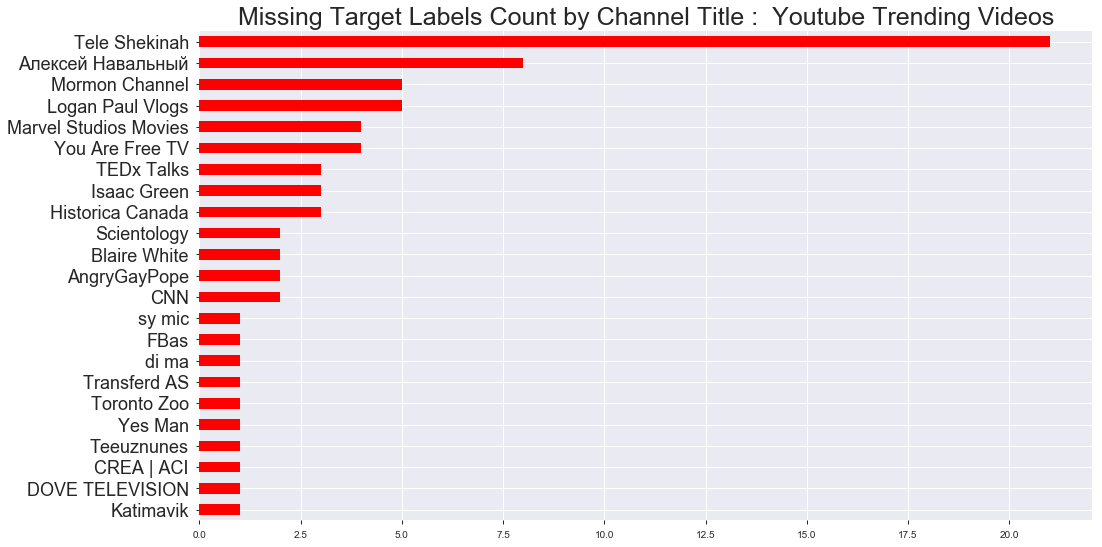

In [25]:
plt.figure(figsize=(16,9))
plt.title("Missing Target Labels Count by Channel Title :  Youtube Trending Videos", fontsize=25)
plt.yticks(fontsize=18)
canada[canada.category_names.isna()].channel_title.value_counts().sort_values().plot.barh(color="red");


In [26]:
def wrangle(X):

    '''Function to preprocess/wrangle data into a usable form'''
    
    #If the video was removed or errored we are not interested
    #in using it to train or evaulate on 
    
    X = X[X.video_error_or_removed == False].copy()
    
    #We only want the correctly labeled data to train and evaluate
    
    X = X[X['category_names'].notnull()]

    X = X.drop(columns=[
    'video_id','publish_time',
    'thumbnail_link','video_error_or_removed',
    'trending_date','category_id'])

    X["title_cleaned"] = X["title"].str.lower()
    X["title_cleaned"] = X["title_cleaned"].str.replace(r'[^\w\s]+', '')

    X["description_cleaned"] = X["description"].str.lower()
    X["description_cleaned"] = X["description_cleaned"].str.replace(r'[^\w\s]+', '')

    X["tags_cleaned"] = X["tags"].str.lower()
    X["tags_cleaned"] = X["tags_cleaned"].str.replace(r'[^\w\s]+', '')
    X['tags_cleaned'] = X['tags_cleaned'].str.replace("|"," ")
    X['tags_cleaned'] = X['tags_cleaned'].str.replace('\"',' ')
    
    X = X.drop(columns=["tags","description","title"])
    X = X.rename(columns={'title_cleaned':'title', 'description_cleaned':'description',
                'tags_cleaned':'tags'})
    
    #fill na values for descriptions

    X['description'] = X["description"].fillna("MISSING")
    
    # Find numeric columns
    num_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

    # Scale the numeric columns to normal distributions with Power Transform
    scaler = PowerTransformer()
    X[num_cols] = scaler.fit_transform(X[num_cols])

    #drop duplicate rows between 
    X = X.drop_duplicates()

    print(X.shape)
    return X


In [27]:
df = wrangle(canada)


(40780, 11)


In [28]:
df.head()

,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category_names,title,description,tags
0,EminemVEVO,2.6735,2.7652,2.7722,3.1723,False,False,Music,eminem walk on water audio ft beyoncé,eminems new track walk on water ft beyoncé is ...,eminemwalkonwateraftermathshadyinterscoperap
1,iDubbbzTV,0.6656,1.5156,0.9261,1.4072,False,False,Comedy,plush bad unboxing fan mail,still got a lot of packages probably will last...,plushbad unboxingunboxingfan mailidubbbztvidub...
2,Rudy Mancuso,1.4608,1.6007,1.5710,1.0929,False,False,Comedy,racist superman rudy mancuso king bach lele ...,watch my previous video nnsubscribe httpswww...,racist supermanrudymancusokingbachracistsuperm...
3,nigahiga,1.1661,1.5374,1.0174,1.6150,False,False,Entertainment,i dare you going bald,i know its been a while since we did this show...,ryanhigahigatvnigahigai dare youidyrhpcdaresno...
4,Ed Sheeran,3.1720,3.3257,2.3541,2.8373,False,False,Music,ed sheeran perfect official music video,httpsadgtytperfectn httpsatlanticrytalbumnsub...,edsheeraned sheeranacousticlivecoverofficialre...


Make sure the scaler put us in a more normal distribution

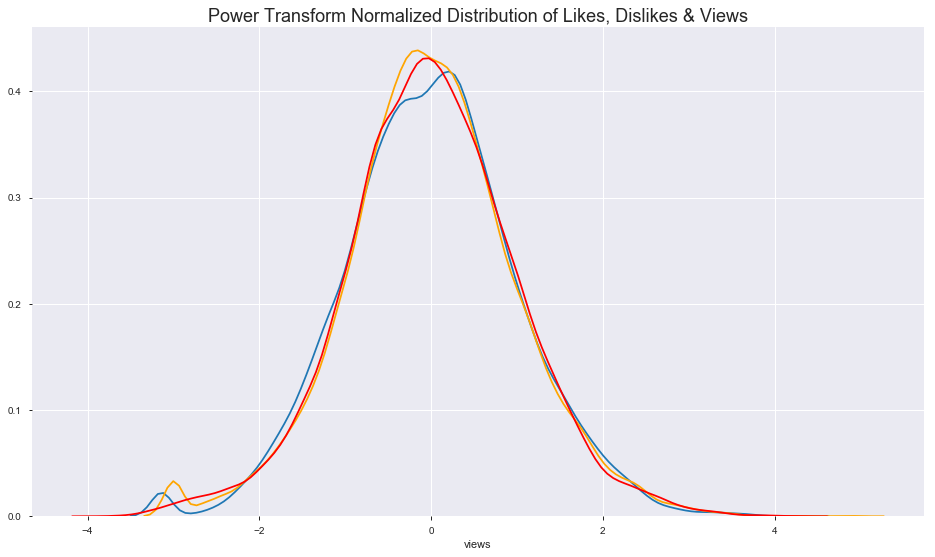

In [29]:
plt.figure(figsize=(16,9))
sns.distplot(df.likes,hist=False)
plt.title("Power Transform Normalized Distribution of Likes, Dislikes & Views", fontsize=18)
sns.distplot(df.dislikes,color="orange",hist=False)
sns.distplot(df.views,color="red", hist=False);

Make sure the tag variable is now clean of "|"'s

In [30]:
df.tags.sample()

34195    niceguysniceguysrrniceguysrnicegirlsredditsubr...
Name: tags, dtype: object

In [31]:
df.isna().sum()

channel_title        0
views                0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
category_names       0
title                0
description          0
tags                 0
dtype: int64

In [32]:
df[df.category_names.isna()]

,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category_names,title,description,tags


In [33]:
df.isna().sum()

channel_title        0
views                0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
category_names       0
title                0
description          0
tags                 0
dtype: int64

In [34]:
df.sample(5)

,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category_names,title,description,tags
21819,好奇视频,-0.7741,-1.4523,-1.0269,-0.6856,False,False,People & Blogs,最强大脑之燃烧吧大脑20180302团队赛开战 车轮战点球大战玩转心跳 选手组cp合力破解...,MISSING,none
17619,OhmynewsTV,-0.6799,-0.8824,-0.0469,-0.2911,False,False,News & Politics,남녘에서 울린 현송월의 노래 김영남을 울리다,11일 오후 서울 국립중앙극장 해오름극장에서 열린 북한 삼지연 관현악단 공연에서 현...,현송월김여정김영남삼지연관현악단통일평창올림픽문재인북한
534,SPORTSNET,-1.1965,-1.2556,-1.8248,-0.7152,False,False,Sports,gotta see it chaotic bench brawl erupts betwee...,the calgary flames and detroit red wings got i...,sportsnetsportscanadacalgary flamesflamesbrawl...
38219,Eat Bulaga!,-0.9982,-1.2534,-0.8276,-1.3655,False,False,Entertainment,juan for all all for juan sugod bahay may 31 ...,subscribe to our channel now to get exclusive ...,dabarkadseat bulaga
39647,First Things First: Cris Carter and Nick Wright,-0.3074,-0.8077,-0.2698,-0.0820,False,False,Sports,nick wright on the consequences for basketball...,lebron james just went down 30 in the 2018 nba...,andre iguodalaandreiguodalabronhan solosololeb...


In [35]:
print(type(df.description[12005]))
df.description[12005]

<class 'str'>


' follow for news  httpstwittercomkeemstarnnsub nudah httpwwwyoutubecomnudahnfollow nudah httptwittercomnudahnndownload fortnite here httpspixlygo2cloudorgshfl each install from this affiliate link will help support my channelnn follow for livestreams  httpsgamingyoutubecomkeemstarnn keem merchnhttpkeemshirtzcoolnn use code keemnhttpsgfuelcompageskeemstarnndollar in the woods out nown itunesnhttpsitunesapplecomusalbumdollarinthewoodssingleid1295414119httpsitunesapplecomusalbumdollarinthewoodssingleid1295414119nn spotify nhttpsopenspotifycomtrack3uuhokwqpbj5qoregbguc9siv4cgsbbrnn youtube music videonhttpsyoutuben38qxi7tvwonnadpocalypse my new gamen apple iosnhttpsitunesapplecomusapptheadpocalypseid1263621591nn androidnhttpsplaygooglecomstoreappsdetailsidcomprojectorgameshowtogetahead'

In [36]:
document_lengths = np.array(list(map(len, df['description'].str.split(' '))))

print("The average number of words in a video description is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a video description is: {}.".format(min(document_lengths)))
print("The maximum number of words in a video description is: {}.\n".format(max(document_lengths)))

document_lengths2 = np.array(list(map(len, df['title'].str.split(' '))))

print("The average number of words in a video title is: {}.".format(np.mean(document_lengths2)))
print("The minimum number of words in a video title is: {}.".format(min(document_lengths2)))
print("The maximum number of words in a video title is: {}.\n".format(max(document_lengths2)))


document_lengths3 = np.array(list(map(len, df['tags'].str.split(' '))))

print("The average number of words in a video tags is: {}.".format(np.mean(document_lengths3)))
print("The minimum number of words in a video tags is: {}.".format(min(document_lengths3)))
print("The maximum number of words in a video tags is: {}.\n".format(max(document_lengths3)))


The average number of words in a video description is: 111.02513487003434.
The minimum number of words in a video description is: 1.
The maximum number of words in a video description is: 926.

The average number of words in a video title is: 9.373540951446788.
The minimum number of words in a video title is: 1.
The maximum number of words in a video title is: 30.

The average number of words in a video tags is: 18.898675821481117.
The minimum number of words in a video tags is: 1.
The maximum number of words in a video tags is: 87.



## CountVectorize the Description Feature for Category Extraction

In [37]:
#what 100 words show up most frequently we may want to exclude?

In [38]:
words = pd.DataFrame(pd.Series(' '.join(df['description']).split()).value_counts()[:100])

In [39]:
words = words.reset_index()
words = words.rename(columns={"index":"word", "0":"count"})
words.head()


,word,0
0,the,132032
1,to,84934
2,and,82367
3,on,60243
4,of,57256


In [40]:
# NLTK Stop words
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend([
    'from', 'subject', 're', 'edu', 'use',
    'follow', 'http', 'www', 'facebook',
    'instagram','twitter', 'youtube',
    'channel','subscribe','video',
    'subscribers', 'like'
])


In [41]:
#What other words may have little value from the top 100?

In [42]:
tops = list(set(words.word)-set(stop_words))
tops

['love',
 'one',
 'late',
 'news',
 'watch',
 'show',
 'episode',
 'every',
 'de',
 'best',
 'official',
 'n',
 'food',
 'make',
 'production',
 '_',
 'website',
 'tv',
 'us',
 'new',
 'à',
 'la',
 'world',
 'get',
 'live',
 '2018',
 'first',
 'time',
 'videos',
 'music',
 'latest',
 'full']

In [43]:
#Add them to the list of words to exclude
stop_words.extend(tops)

In [44]:

from sklearn.feature_extraction.text import CountVectorizer


tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_words,
                                max_df = 0.8, #the word is ignored if in more than 80% of corpus
                                min_df = 5) #the word shows up in a minimum of 5 times of corpus

dtm_tf = tf_vectorizer.fit_transform(df['description'])

dtm_feature_names = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape for description: {}'.format(dtm_tf.shape))


Document Term Matrix Shape for description: (40780, 143199)


### There are 17 distinct target categories to predict, so starting with this in the LDA Model appears logical

In [45]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 17
lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=17, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=10, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [46]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [47]:
n_top_words = 10

In [48]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda_tf, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0: beauty makeup please free season espn ufc support im awesome
Topic #1: missing young turks young turks fortnite cenk game real uygur cenk uygur
Topic #2: hum drama film top page hd 10 social kevin dramas
Topic #3: troom des diy un pranks hacks blagues school troom troom pour
Topic #4: edge challenges real hbo comedy james see games team challenge
Topic #5: vs sms dial barcelona madrid real vs barcelona goals highlights peterson
Topic #6: voice cbs episodes stephen colbert stephen colbert access pm bon night
Topic #7: rani link vaani awards family tamil mythical gmm india film
Topic #8: via warner chappell warner chappell via warner today nfl iphone audio life
Topic #9: trump president fox nba also people house would check copyright
Topic #10: street river underwater iphone im lost underwater river diving delicious scuba
Topic #11: msnbc jimmy ant tonight fallon jimmy fallon starring tonight starring starring jimmy link
Topic #12: cbc comment fair song co

In [49]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# Visualize the topics
description_vis_data = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


#### Once you have the visualization data prepared you can do a number of things with it. You can save the vis to an stand-alone HTML file, serve it, or display it in the notebook.


In [50]:
pyLDAvis.display(description_vis_data)

In [51]:
# Extract Topic Distributions from LDA model for each video
col_names = ["Desc. Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf.transform(dtm_tf)
topic_df = pd.DataFrame(topic_dist, columns = col_names)

# Join topic dataframe with numerical features from Method #1
df2 = pd.concat([df, topic_df], axis=1)
print(f'Original Dataframe Shape: {df.shape}')
print(f'New Dataframe Shape: {df2.shape}\n')
df2.head()

Original Dataframe Shape: (40780, 11)
New Dataframe Shape: (40881, 28)



,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category_names,title,description,tags,Desc. Topic 0,Desc. Topic 1,Desc. Topic 2,Desc. Topic 3,Desc. Topic 4,Desc. Topic 5,Desc. Topic 6,Desc. Topic 7,Desc. Topic 8,Desc. Topic 9,Desc. Topic 10,Desc. Topic 11,Desc. Topic 12,Desc. Topic 13,Desc. Topic 14,Desc. Topic 15,Desc. Topic 16
0,EminemVEVO,2.6735,2.7652,2.7722,3.1723,False,False,Music,eminem walk on water audio ft beyoncé,eminems new track walk on water ft beyoncé is ...,eminemwalkonwateraftermathshadyinterscoperap,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.6698,0.3035
1,iDubbbzTV,0.6656,1.5156,0.9261,1.4072,False,False,Comedy,plush bad unboxing fan mail,still got a lot of packages probably will last...,plushbad unboxingunboxingfan mailidubbbztvidub...,0.9838,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010
2,Rudy Mancuso,1.4608,1.6007,1.5710,1.0929,False,False,Comedy,racist superman rudy mancuso king bach lele ...,watch my previous video nnsubscribe httpswww...,racist supermanrudymancusokingbachracistsuperm...,0.0009,0.0009,0.0009,0.0009,0.0009,0.9857,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009
3,nigahiga,1.1661,1.5374,1.0174,1.6150,False,False,Entertainment,i dare you going bald,i know its been a while since we did this show...,ryanhigahigatvnigahigai dare youidyrhpcdaresno...,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.9781,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014
4,Ed Sheeran,3.1720,3.3257,2.3541,2.8373,False,False,Music,ed sheeran perfect official music video,httpsadgtytperfectn httpsatlanticrytalbumnsub...,edsheeraned sheeranacousticlivecoverofficialre...,0.0006,0.3193,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.4022,0.0006,0.2694,0.0006,0.0006,0.0006,0.0006,0.0006


In [52]:
df2  = df2.drop(columns='description')
#df2 = df2.fillna(0)

### Title Category Vectorized

#### Again lets see what our word bank of top frequency for this feature can show us

In [53]:
words_title = pd.DataFrame(pd.Series(' '.join(df['title']).split()).value_counts()[:100])

In [54]:
words_title = words_title.reset_index()
words_title = words_title.rename(columns={"index":"word", "0":"count"})
words_title.head(10)

,word,0
0,the,8442
1,2018,4332
2,to,3739
3,in,2972
4,a,2937
5,of,2686
6,episode,2522
7,on,2256
8,and,2251
9,with,2249


In [55]:
stop_wordz = stopwords.words('english')
topz = list(set(words_title.word)-set(stop_wordz))
topz

['love',
 'season',
 'game',
 '4',
 'may',
 'ft',
 'trump',
 'news',
 'movie',
 'ever',
 'hd',
 'audio',
 '1',
 'christmas',
 'trailer',
 'show',
 'real',
 'episode',
 'de',
 'best',
 '7',
 'song',
 '5',
 'challenge',
 'official',
 '6',
 'الحلقة',
 '2',
 'ep',
 'video',
 'food',
 '2017',
 'top',
 '10',
 'joe',
 'react',
 'songs',
 'march',
 'tv',
 'new',
 'vs',
 'la',
 'highlights',
 'world',
 'life',
 'live',
 'day',
 '2018',
 'nba',
 'paul',
 '3',
 'first',
 'feat',
 'drama',
 'time',
 'awards',
 'punjabi',
 'part',
 'music',
 'latest',
 'full']

#### Since these words exist in the title of the Videos and thus have more correlation to the actual categories they would have to be "cherry picked" instead of automated for removal where they may be redundant. Since the goal is to have a autonomous system of video categorization via the model if this were t be succesful as a cyclical train, predict, update paradigm it would be futile to hand pick terms now. Instead, opting for generic removals  without blindly using the set differences is optimal.

In [56]:
#Add them to the list of words to exclude
stop_wordz.extend([
     '2018','10','2017','7',
    'la','2','1','6','4','5',
     '3','video'

])

In [57]:
tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_wordz,
                                max_df = 0.6, #the word is ignored if in more than 60% of corpus
                                min_df = 2) #the word shows up in a minimum of 2 observations

dtm_tf_title  = tf_vectorizer.fit_transform(df['title'])

dtm_feature_names_title = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape for description: {}'.format(dtm_tf.shape))

Document Term Matrix Shape for description: (40780, 143199)


#### The choice to remain using 17 topics as the target is conceptually, there may be a consistency bonus between the features by doing so. If in one feature the model designates the topic more than another either the title topic will reinforce that probability or balance it by pulling it in another destinct class for the trees later to divide. At least that is the hope.

In [58]:
n_topics = 17
lda_tf_title = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf_title.fit(dtm_tf_title)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=17, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=10, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [59]:
n_top_words = 10

In [60]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda_tf_title, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0: trump show daily look daily show part doki closer look closer game
Topic #1: episode highlights vs goals rani real vaani ரண vaani rani episode வண ரண
Topic #2: official trailer official trailer war infinity full infinity war hd avengers song
Topic #3: ft real food official justin bill trudeau bill maher maher time
Topic #4: react live vs challenge graham show kids norton graham norton norton show
Topic #5: official hd new episode promo season season episode movie hd season trailer
Topic #6: new know music les top official drake plan faché lama faché
Topic #7: joe news vs rogan joe rogan episode trump super day challenge
Topic #8: episode الحلقة مسلسل drama digital ary digital ary digital drama partie john
Topic #9: full episode ep full episode crime patrol crime patrol vs 100 ka
Topic #10: paul logan punjabi song logan paul music latest latest punjabi full jake
Topic #11: juan got take talent trump first got talent juan juan bahay first take
Topic #12: ho

## This is a much better segregation of topics when looking at the Intertopic Distance. Hopefully, that translate to destinct label classes as well

In [61]:
# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf_title, dtm_tf_title, tf_vectorizer)

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            x       y  topics  cluster   Freq
topic                                        
13     0.0395  0.2468       1        1 7.3598
2     -0.1001 -0.0629       2        1 6.9501
10    -0.1395 -0.0026       3        1 6.7855
9      0.1829  0.1069       4        1 6.4699
6     -0.0564 -0.0664       5        1 6.0103
0     -0.0279 -0.0065       6        1 5.7930
8      0.2176 -0.1366       7        1 5.7766
16     0.1054 -0.1409       8        1 5.7057
11    -0.0149  0.0157       9        1 5.6876
1      0.0510  0.0694      10        1 5.6395
14    -0.0659 -0.0087      11        1 5.6213
7      0.0434  0.0517      12        1 5.6106
5      0.0104 -0.1071      13        1 5.5350
3     -0.0713 -0.0067      14        1 5.4566
4     -0.0373  0.0736      15        1 5.4540
15    -0.0869 -0.0181      16        1 5.1865
12    -0.0500 -0.0075      17        1 4.9582, topic_info=      Category      Freq                    Term     Total  loglift  logprob
22155  Default 1137.0000                    game 1137.0000  30.0000  30.0000
17987  Default 2212.0000                 episode 2212.0000  29.0000  29.0000
36597  Default  495.0000                     nba  495.0000  28.0000  28.0000
59944  Default  452.0000                  الحلقة  452.0000  27.0000  27.0000
39478  Default  430.0000                    paul  430.0000  26.0000  26.0000
25241  Default  706.0000              highlights  706.0000  25.0000  25.0000
21710  Default 1766.0000                    full 1766.0000  24.0000  24.0000
21751  Default  395.0000            full episode  395.0000  23.0000  23.0000
11312  Default  410.0000               christmas  410.0000  22.0000  22.0000
22189  Default  348.0000         game highlights  348.0000  21.0000  21.0000
53457  Default  839.0000                 trailer  839.0000  20.0000  20.0000
56481  Default 1785.0000                      vs 1785.0000  19.0000  19.0000
17746  Default  542.0000                      ep  542.0000  18.0000  18.0000
16308  Default  480.0000                   drama  480.0000  17.0000  17.0000
31771  Default  287.0000                   logan  287.0000  16.0000  16.0000
21759  Default  291.0000               full game  291.0000  15.0000  15.0000
60729  Default  262.0000                   مسلسل  262.0000  14.0000  14.0000
38106  Default  397.0000        official trailer  397.0000  13.0000  13.0000
38037  Default 1804.0000                official 1804.0000  12.0000  12.0000
42035  Default  470.0000                 punjabi  470.0000  11.0000  11.0000
28241  Default  364.0000                     joe  364.0000  10.0000  10.0000
54061  Default  989.0000                   trump  989.0000   9.0000   9.0000
42977  Default  376.0000                   react  376.0000   8.0000   8.0000
31773  Default  244.0000              logan paul  244.0000   7.0000   7.0000
1499   Default  241.0000                  201718  241.0000   6.0000   6.0000
54688  Default  414.0000                      tv  414.0000   5.0000   5.0000
10218  Default  237.0000               cavaliers  237.0000   4.0000   4.0000
46501  Default  686.0000                  season  686.0000   3.0000   3.0000
5843   Default  292.0000                  awards  292.0000   2.0000   2.0000
28516  Default  208.0000                    juan  208.0000   1.0000   1.0000
22189   Topic1  348.1191         game highlights  348.9440   2.6068  -4.5494
21759   Topic1  291.0018               full game  291.8251   2.6063  -4.7286
1499    Topic1  241.0183                  201718  241.8461   2.6057  -4.9171
10218   Topic1  236.5603               cavaliers  237.3837   2.6057  -4.9357
42815   Topic1  226.7430                 raptors  227.5664   2.6055  -4.9781
11637   Topic1  177.6565               cleveland  178.4799   2.6045  -5.2221
11638   Topic1  170.5166     cleveland cavaliers  171.3400   2.6043  -5.2631
36627   Topic1  169.6241              nba season  170.4475   2.6043  -5.2684
53225   Topic1  139.2797         toronto raptors  140.1031   2.6032  -5.4655
102

### Right off I am noticing in the new dataframe below there is no obvious correlation in the Desc topics of Music. Observations 0 & 4 for the Desc. Topic 15 & 1 respectively don't show a lean into symmetry as hoped.  However, Title Topic complements each other perfectly.

In [62]:
# Extract Topic Distributions from LDA model for each video
col_names = ["Title_Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf_title.transform(dtm_tf_title)
topic_df_title = pd.DataFrame(topic_dist, columns = col_names)

# Join topic dataframe with numerical features from Method #1
df3 = pd.concat([df2, topic_df_title], axis=1)
df3  = df3.drop(columns='title')
print(f'Original Dataframe Shape: {df2.shape}')
print(f'New Dataframe Shape: {df3.shape}\n')
df3.head()

Original Dataframe Shape: (40881, 27)
New Dataframe Shape: (40881, 43)



,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category_names,tags,Desc. Topic 0,Desc. Topic 1,Desc. Topic 2,Desc. Topic 3,Desc. Topic 4,Desc. Topic 5,Desc. Topic 6,Desc. Topic 7,Desc. Topic 8,Desc. Topic 9,Desc. Topic 10,Desc. Topic 11,Desc. Topic 12,Desc. Topic 13,Desc. Topic 14,Desc. Topic 15,Desc. Topic 16,Title_Topic 0,Title_Topic 1,Title_Topic 2,Title_Topic 3,Title_Topic 4,Title_Topic 5,Title_Topic 6,Title_Topic 7,Title_Topic 8,Title_Topic 9,Title_Topic 10,Title_Topic 11,Title_Topic 12,Title_Topic 13,Title_Topic 14,Title_Topic 15,Title_Topic 16
0,EminemVEVO,2.6735,2.7652,2.7722,3.1723,False,False,Music,eminemwalkonwateraftermathshadyinterscoperap,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.6698,0.3035,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.9216,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049
1,iDubbbzTV,0.6656,1.5156,0.9261,1.4072,False,False,Comedy,plushbad unboxingunboxingfan mailidubbbztvidub...,0.9838,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.9059,0.0059,0.0059,0.0059,0.0059,0.0059
2,Rudy Mancuso,1.4608,1.6007,1.5710,1.0929,False,False,Comedy,racist supermanrudymancusokingbachracistsuperm...,0.0009,0.0009,0.0009,0.0009,0.0009,0.9857,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.9412,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037
3,nigahiga,1.1661,1.5374,1.0174,1.6150,False,False,Entertainment,ryanhigahigatvnigahigai dare youidyrhpcdaresno...,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.9781,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0098,0.0098,0.0098,0.0098,0.0098,0.8431,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098
4,Ed Sheeran,3.1720,3.3257,2.3541,2.8373,False,False,Music,edsheeraned sheeranacousticlivecoverofficialre...,0.0006,0.3193,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.4022,0.0006,0.2694,0.0006,0.0006,0.0006,0.0006,0.0006,0.0059,0.0059,0.7426,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.1691


### Now the Tag Information 

In [63]:
words_tag = pd.DataFrame(pd.Series(' '.join(df['tags']).split()).value_counts()[:100])

In [64]:
words_tag = words_tag.reset_index()
words_tag = words_tag.rename(columns={"index":"word", "0":"count"})
words_tag.head(10)

,word,0
0,the,8032
1,to,5552
2,of,5400
3,and,5162
4,vs,4678
5,in,4256
6,new,3154
7,a,2425
8,none,2371
9,punjabi,2222


In [65]:
words_tag

,word,0
0,the,8032
1,to,5552
2,of,5400
3,and,5162
4,vs,4678
5,in,4256
6,new,3154
7,a,2425
8,none,2371
9,punjabi,2222


### The tag features look value adding within the top 20 even though they are repetitve, however the numbers and "new" seem irrelevant.

In [66]:
stop_wordc = stopwords.words('english')
topc = list(set(words_tag.word)-set(stop_wordc))
topc

['norton',
 'season',
 'late',
 'comedy',
 'game',
 'link',
 'night',
 'news',
 'talent',
 'trump',
 'movie',
 'christmas',
 'movies',
 'show',
 'real',
 'brothers',
 'episode',
 'de',
 'best',
 'ball',
 'bowl',
 'doki',
 'song',
 'flash',
 'x',
 'taste',
 '2',
 'official',
 'infinity',
 'songspunjabi',
 'الحلقة',
 'school',
 'super',
 'video',
 'funny',
 'food',
 '2017',
 'rhett',
 'rogan',
 'mythical',
 'make',
 'hell',
 'b',
 'perfect',
 'top',
 '10',
 'action',
 'war',
 'youtubeyoutube',
 'last',
 'songs',
 'got',
 'street',
 'tulfo',
 'tv',
 'new',
 'vs',
 'world',
 'none',
 'highlights',
 'life',
 'voice',
 'live',
 '2018',
 'ramsay',
 'paul',
 'mehta',
 'first',
 'know',
 'wedding',
 'punjabi',
 'makeup',
 'star',
 'music',
 'latest',
 'full']

In [67]:
#Add them to the list of words to exclude
stop_wordc.extend([
     '2018','10','2017','7',
    'la','2','1','6','4','5',
     '3','new'

])

In [68]:
tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_wordc,
                                max_df = 0.8, #the word is ignored if in more than 80% of corpus
                                min_df = 2) #the word shows up in a minimum of 2 observations

dtm_tf_tags  = tf_vectorizer.fit_transform(df['tags'])

dtm_feature_names_tag = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape for description: {}'.format(dtm_tf.shape))

Document Term Matrix Shape for description: (40780, 143199)


In [69]:
n_topics = 17
lda_tf_tags = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf_tags.fit(dtm_tf_tags)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=17, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=10, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [70]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda_tf_tags, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0: punjabi songs punjabi songs songspunjabi song latest perfect take de songslatest
Topic #1: mythical episode office link season news anatomy rhett today ai
Topic #2: ramsay brothers defranco know nightmares defranco showphilip showphilip episode volcano knowdo
Topic #3: hell doki wars game literature doki literature club battle de universenerf
Topic #4: news movie mai mowryadrienne mowryadrienne bailonloni bailonloni lovejeannie bailonloni realdaytimetalk lovejeannie showwomentamera mowryadrienne
Topic #5: tulfo action memes sa memesdank tulfo action world dank comment compilationdank
Topic #6: got bowl talent got talent de season best super newshappening latest newshappening
Topic #7: vs game full full game highlights cavaliers state warriors highlightscleveland james
Topic #8: late trump food school norton last first ball donald flash
Topic #9: time funny youtubeyoutube smith lawyer raniraniradhika kuripuradhika lawyer kuripuradhika aravindsuntvvanirani

In [71]:
# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf_tags, dtm_tf_tags, tf_vectorizer)

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            x       y  topics  cluster   Freq
topic                                        
0      0.1619  0.3112       1        1 7.7848
8      0.1660 -0.1202       2        1 7.1456
1      0.1114 -0.0942       3        1 6.7929
7     -0.1262  0.1042       4        1 6.6487
15    -0.0564 -0.0429       5        1 6.1105
16    -0.0998 -0.0832       6        1 6.0764
11     0.1640 -0.0719       7        1 6.0572
13    -0.0769 -0.0189       8        1 5.7877
2      0.0549 -0.0384       9        1 5.7400
5     -0.0814  0.0479      10        1 5.6357
10    -0.0869  0.0167      11        1 5.3615
9     -0.0807  0.0060      12        1 5.3167
3     -0.0438 -0.0173      13        1 5.2892
12     0.0120 -0.0081      14        1 5.1631
4     -0.0175  0.0082      15        1 5.0687
6      0.0050  0.0255      16        1 5.0437
14    -0.0055 -0.0246      17        1 4.9777, topic_info=       Category      Freq                                               Term  \
120502  Default 1955.0000                                               none   
135265  Default 1964.0000                                            punjabi   
185667  Default 4019.0000                                                 vs   
158400  Default 1855.0000                                              songs   
126874  Default 1004.0000                                               paul   
68253   Default 1512.0000                                               game   
135343  Default  710.0000                                      punjabi songs   
185123  Default  824.0000                                              voice   
159360  Default  697.0000                                       songspunjabi   
115943  Default  785.0000                                           mythical   
77899   Default  527.0000                                               hell   
177709  Default  524.0000                                              tulfo   
95381   Default  863.0000                                               late   
72823   Default  702.0000                                                got   
9374    Default  498.0000                                             action   
137172  Default  701.0000                                             ramsay   
66814   Default  461.0000                                          full game   
107204  Default  446.0000                                              mehta   
49210   Default  413.0000                                               doki   
24343   Default  453.0000                                               bowl   
157533  Default  792.0000                                               song   
107623  Default  387.0000                                              memes   
98621   Default  530.0000                                               link   
62953   Default 1019.0000                                               food   
85517   Default  376.0000                                             iphone   
126818  Default  360.0000                                             patrol   
122071  Default  382.0000                                             office   
41738   Default  359.0000                                              crime   
142578  Default  463.0000                                              rhett   
166470  Default  413.0000                                             talent   
135265   Topic1 1963.5434                                            punjabi   
135343   Topic1  709.6985                                      punjabi songs   
159360   Topic1  696.4423                                       songspunjabi   
4724     Topic1  197.0599                                        2018punjabi   
135386   Topic1  165.3121                               punjabi songspunjabi   
158478   Topic1  149.4047                                  songs 2018punjabi   
95507    Topic1  140.5673                                latest songspunjabi   
159253   Topic1  140.5673                  

In [72]:
# Extract Topic Distributions from LDA model for each video
col_names = ["Tags Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf_tags.transform(dtm_tf_tags)
topic_df_tags = pd.DataFrame(topic_dist, columns = col_names)

# Join topic dataframe with numerical features from Method #1
df4 = pd.concat([df3, topic_df_tags], axis=1)
df4  = df4.drop(columns='tags')
print(f'Original Dataframe Shape: {df3.shape}')
print(f'New Dataframe Shape: {df4.shape}\n')
df4.head()

Original Dataframe Shape: (40881, 43)
New Dataframe Shape: (40881, 59)



,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category_names,Desc. Topic 0,Desc. Topic 1,Desc. Topic 2,Desc. Topic 3,Desc. Topic 4,Desc. Topic 5,Desc. Topic 6,Desc. Topic 7,Desc. Topic 8,Desc. Topic 9,Desc. Topic 10,Desc. Topic 11,Desc. Topic 12,Desc. Topic 13,Desc. Topic 14,Desc. Topic 15,Desc. Topic 16,Title_Topic 0,Title_Topic 1,Title_Topic 2,Title_Topic 3,Title_Topic 4,Title_Topic 5,Title_Topic 6,Title_Topic 7,Title_Topic 8,Title_Topic 9,Title_Topic 10,Title_Topic 11,Title_Topic 12,Title_Topic 13,Title_Topic 14,Title_Topic 15,Title_Topic 16,Tags Topic 0,Tags Topic 1,Tags Topic 2,Tags Topic 3,Tags Topic 4,Tags Topic 5,Tags Topic 6,Tags Topic 7,Tags Topic 8,Tags Topic 9,Tags Topic 10,Tags Topic 11,Tags Topic 12,Tags Topic 13,Tags Topic 14,Tags Topic 15,Tags Topic 16
0,EminemVEVO,2.6735,2.7652,2.7722,3.1723,False,False,Music,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.0018,0.6698,0.3035,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.9216,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.5294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294
1,iDubbbzTV,0.6656,1.5156,0.9261,1.4072,False,False,Comedy,0.9838,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.9059,0.0059,0.0059,0.0059,0.0059,0.0059,0.8824,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074
2,Rudy Mancuso,1.4608,1.6007,1.5710,1.0929,False,False,Comedy,0.0009,0.0009,0.0009,0.0009,0.0009,0.9857,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.9412,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.9686,0.0020,0.0020,0.0020,0.0020
3,nigahiga,1.1661,1.5374,1.0174,1.6150,False,False,Entertainment,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.9781,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0098,0.0098,0.0098,0.0098,0.0098,0.8431,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.8824,0.0074,0.0074,0.0074
4,Ed Sheeran,3.1720,3.3257,2.3541,2.8373,False,False,Music,0.0006,0.3193,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.4022,0.0006,0.2694,0.0006,0.0006,0.0006,0.0006,0.0006,0.0059,0.0059,0.7426,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.1691,0.8431,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098


In [73]:
df.iloc[43]

channel_title                                              jeffreestar
views                                                           0.9946
likes                                                           1.3666
dislikes                                                        0.6303
comment_count                                                   1.6719
comments_disabled                                                False
ratings_disabled                                                 False
category_names                                           Howto & Style
title                holiday 2017  collection  skin frost palette r...
description          hey everyone  today im revealing my entire hol...
tags                 jeffree starjeffree star cosmeticsjeffree star...
Name: 44, dtype: object

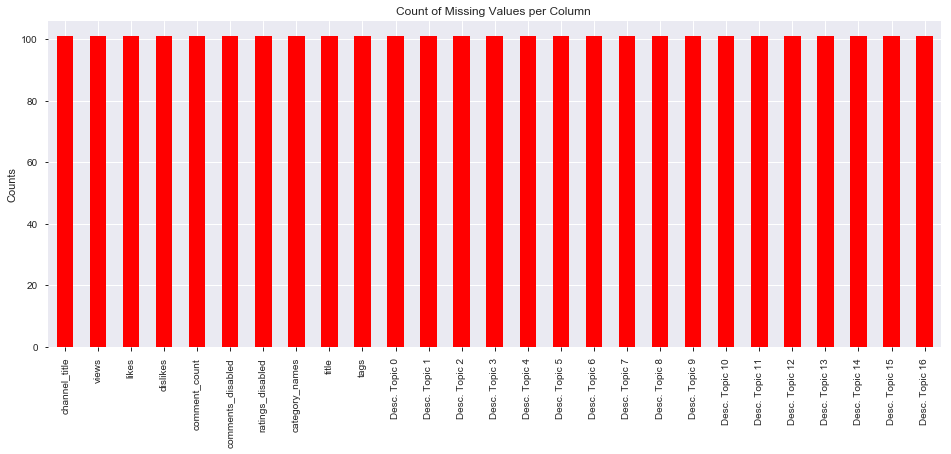

In [74]:
df2[df2.channel_title.isna()]
#df4.isna().sum()
#df3.isna().sum()
#df2.isna().sum()
#df.isna().sum()
missplot(df2)

In [75]:
df4.dropna(inplace=True)
df.isna().sum()

channel_title        0
views                0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
category_names       0
title                0
description          0
tags                 0
dtype: int64

In [76]:
#3 Way holdout for large datasets

'''stratify method will keep the same fraction of labels in the split
 so the label you are predicting will have a very close proportion
 of the same label split - good for class imbalances'''

#50/50 split on test and train to make sure we have enough data in each
X_train, X_test = train_test_split(df4, test_size=0.50, random_state=42)

#80/20 split on train and val 
X_train, X_val = train_test_split(X_train.copy(), test_size=0.20, random_state=42)

X_train.shape, X_val.shape, X_test.shape

((16271, 59), (4068, 59), (20340, 59))

In [77]:
X_test.head()

,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category_names,Desc. Topic 0,Desc. Topic 1,Desc. Topic 2,Desc. Topic 3,Desc. Topic 4,Desc. Topic 5,Desc. Topic 6,Desc. Topic 7,Desc. Topic 8,Desc. Topic 9,Desc. Topic 10,Desc. Topic 11,Desc. Topic 12,Desc. Topic 13,Desc. Topic 14,Desc. Topic 15,Desc. Topic 16,Title_Topic 0,Title_Topic 1,Title_Topic 2,Title_Topic 3,Title_Topic 4,Title_Topic 5,Title_Topic 6,Title_Topic 7,Title_Topic 8,Title_Topic 9,Title_Topic 10,Title_Topic 11,Title_Topic 12,Title_Topic 13,Title_Topic 14,Title_Topic 15,Title_Topic 16,Tags Topic 0,Tags Topic 1,Tags Topic 2,Tags Topic 3,Tags Topic 4,Tags Topic 5,Tags Topic 6,Tags Topic 7,Tags Topic 8,Tags Topic 9,Tags Topic 10,Tags Topic 11,Tags Topic 12,Tags Topic 13,Tags Topic 14,Tags Topic 15,Tags Topic 16
34885,Salman Khan Films,2.0329,2.0446,2.7766,2.3594,False,False,Entertainment,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.7762,0.0025,0.0025,0.0025,0.1870,0.0025,0.0045,0.0045,0.0045,0.0045,0.0045,0.0045,0.0045,0.0045,0.9276,0.0045,0.0045,0.0045,0.0045,0.0045,0.0045,0.0045,0.0045,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.9848
23332,h3h3Productions,1.4514,1.8803,1.7241,1.8120,False,False,Entertainment,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.9829,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.7647,0.0147,0.0147,0.0147,0.0147,0.9686,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020
8377,fuvak,-0.6851,-1.3262,-0.3725,-0.5186,False,False,People & Blogs,0.0065,0.0065,0.0065,0.0065,0.0065,0.1729,0.0065,0.0065,0.0065,0.0065,0.3101,0.0065,0.0065,0.4255,0.0065,0.0065,0.0065,0.5294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588
5876,Munchies,-0.2943,0.0649,-0.4006,-0.4514,False,False,Entertainment,0.0294,0.5294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0588,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.5294,0.0294,0.0294,0.0294,0.0294
26047,ToThe9s,-1.6956,-0.6463,-1.7304,-1.2767,False,False,Howto & Style,0.0006,0.0990,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.0006,0.8923,0.0006,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.9412,0.0037,0.0037,0.0022,0.0022,0.0022,0.0022,0.0022,0.0022,0.0022,0.8897,0.0776,0.0022,0.0022,0.0022,0.0022,0.0022,0.0022,0.0022,0.0022


In [78]:
target = 'category_names'
features = df2.columns

y_test = X_test[target]
y_val = X_val[target]
y_train = X_train[target]

In [79]:
X_train = X_train.drop(columns= target)
X_val = X_val.drop(columns= target)
X_test = X_test.drop(columns= target)

In [80]:
X_train.head()
X_train.isna().sum()
X_test.isna().sum().T
len(X_train.channel_title.value_counts())

3519

In [81]:
y_train.head()

17017    Film & Animation
20920       Entertainment
2239        Entertainment
35923              Sports
5897     Film & Animation
Name: category_names, dtype: object

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
cats = X_train.select_dtypes("object").columns.tolist()

In [84]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(cols = cats),
    RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=42)
    
)

# Fit on train, score on val, predict on test
pipeline.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=['channel_title', 'comments_disabled', 'ratings_disabled'],
        drop_invariant=False, handle_unknown='impute', impute_missing=True,
        mapping=[{'col': 'channel_title', 'mapping': [('Tasvir Gostar Pasargad', 1), ('Infinite Lists', 2), ('Channel ...mators=2000, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])

In [85]:
y_pred_val = pipeline.predict(X_val)

In [86]:
accuracy_score(y_val, y_pred_val)

0.3928220255653884

# NEED LABELPowerset model

In [87]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

#categorical encode again
oc = ce.OrdinalEncoder(cols = cats)

X_train_coded = oc.fit_transform(X_train)
X_val_coded = oc.fit_transform(X_val)
X_test_coded = oc.fit_transform(X_test)

X_train_coded.head(5)

,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Desc. Topic 0,Desc. Topic 1,Desc. Topic 2,Desc. Topic 3,Desc. Topic 4,Desc. Topic 5,Desc. Topic 6,Desc. Topic 7,Desc. Topic 8,Desc. Topic 9,Desc. Topic 10,Desc. Topic 11,Desc. Topic 12,Desc. Topic 13,Desc. Topic 14,Desc. Topic 15,Desc. Topic 16,Title_Topic 0,Title_Topic 1,Title_Topic 2,Title_Topic 3,Title_Topic 4,Title_Topic 5,Title_Topic 6,Title_Topic 7,Title_Topic 8,Title_Topic 9,Title_Topic 10,Title_Topic 11,Title_Topic 12,Title_Topic 13,Title_Topic 14,Title_Topic 15,Title_Topic 16,Tags Topic 0,Tags Topic 1,Tags Topic 2,Tags Topic 3,Tags Topic 4,Tags Topic 5,Tags Topic 6,Tags Topic 7,Tags Topic 8,Tags Topic 9,Tags Topic 10,Tags Topic 11,Tags Topic 12,Tags Topic 13,Tags Topic 14,Tags Topic 15,Tags Topic 16
17017,1,-0.3732,-0.8245,0.3346,-0.3528,1,1,0.0002,0.0002,0.0002,0.0002,0.0205,0.9760,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0035,0.9446,0.0035,0.0035,0.0035,0.0035,0.0035,0.0035,0.0035,0.0035,0.0035,0.0035,0.0035,0.0035,0.0035,0.0035,0.0035,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.9675
20920,2,-0.8658,0.1177,-0.4697,0.4142,1,1,0.0004,0.0004,0.0004,0.0004,0.0004,0.0004,0.0004,0.0004,0.0004,0.0004,0.0004,0.9933,0.0004,0.0004,0.0004,0.0004,0.0004,0.0049,0.0049,0.0049,0.0049,0.0049,0.2297,0.0049,0.0049,0.0049,0.0049,0.1940,0.5077,0.0049,0.0049,0.0049,0.0049,0.0049,0.0026,0.0026,0.0026,0.0026,0.0026,0.2706,0.0026,0.0026,0.5517,0.0026,0.0026,0.0026,0.1419,0.0026,0.0026,0.0026,0.0026
2239,3,0.3145,0.6564,0.2607,0.9303,1,1,0.5027,0.0027,0.0027,0.0027,0.0027,0.0027,0.0027,0.0027,0.0027,0.0027,0.0027,0.4572,0.0027,0.0027,0.0027,0.0027,0.0027,0.0196,0.0196,0.0196,0.0196,0.0196,0.0196,0.6863,0.0196,0.0196,0.0196,0.0196,0.0196,0.0196,0.0196,0.0196,0.0196,0.0196,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.0049,0.9216,0.0049,0.0049
35923,4,1.4668,0.3411,0.6649,0.6176,1,1,0.0996,0.8595,0.0335,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0098,0.0098,0.0098,0.0098,0.8431,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.0012,0.0012,0.0012,0.0012,0.0012,0.0012,0.0012,0.9815,0.0012,0.0012,0.0012,0.0012,0.0012,0.0012,0.0012,0.0012,0.0012
5897,5,-0.9916,-1.4198,-0.8437,-2.7913,2,1,0.0003,0.0003,0.0003,0.0003,0.0003,0.9960,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.1631,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.7817,0.0037,0.0037,0.0037,0.0037,0.0037,0.0037,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.8134,0.0009,0.1728,0.0009,0.0009,0.0009


In [88]:
#Quick XGBModel to test the potential
xclas = XGBClassifier()  # and for classifier  
xclas.fit(X_train_coded, y_train)  
xclas.predict(X_val_coded)  


print(cross_val_score(xclas, X_train_coded, y_train))

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.49125391 0.50968099 0.5089533 ]


In [89]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(random_state=42,
                max_depth = 4,
                n_estimators=1000,
                learning_rate=0.03,
                early_stopping_rounds =10,
                eval_metric = 'auc' )
)



pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=['channel_title', 'comments_disabled', 'ratings_disabled'],
        drop_invariant=False, handle_unknown='impute', impute_missing=True,
        mapping=[{'col': 'channel_title', 'mapping': [('Tasvir Gostar Pasargad', 1), ('Infinite Lists', 2), ('Channel ...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))])

In [90]:
y_pred = pipeline.predict(X_val)

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

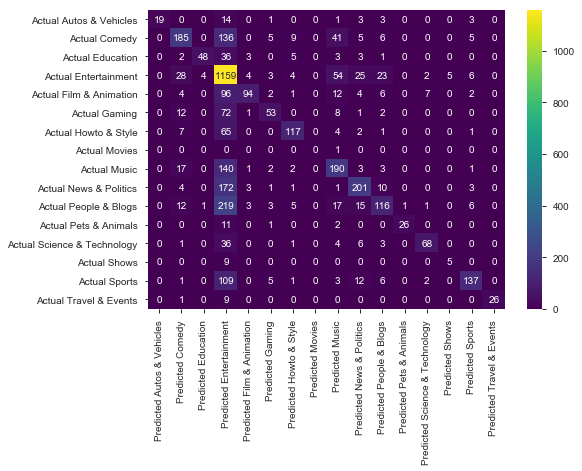

In [92]:
plot_confusion_matrix(y_val, y_pred)